In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import scipy.io
import matplotlib.pyplot as plt
import glob
import re
from IPython.display import display 
import PIL
%matplotlib inline

mat = scipy.io.loadmat('devkit/cars_annos.mat')

print("Downloaded file 'cars_annos.mat' read as a dictionary under the variable 'mat'")
print("Keys of the dict mat are: {}".format(mat.keys()))


Bad key "text.kerning_factor" on line 4 in
C:\Users\Howlw\anaconda3\envs\py3_TF2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Downloaded file 'cars_annos.mat' read as a dictionary under the variable 'mat'
Keys of the dict mat are: dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])


In [2]:
print("Number of classes: {}".format(len(mat['class_names'][0])))

Number of classes: 196


In [3]:
print((mat['annotations'][0][5]))

(array(['car_ims/000006.jpg'], dtype='<U18'), array([[10]], dtype=uint8), array([[6]], dtype=uint8), array([[250]], dtype=uint8), array([[110]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))


In [3]:
# Definition nötiger Methoden zur weiteren Bearbeitung und Automatisierung

def bringAnnot(fileName):
# Output der Annotation von fileName
    if type(fileName) == str:
        numb = int(re.sub(r'[^0-9]', '', fileName))
    else:
        numb = int(fileName)
    
    print((mat['annotations'][0][numb-1]))    

def bringup_ClassLabel(fileName):
# Output des ClassLabel von fileName
    if type(fileName) == str:
        numb = int(re.sub(r'[^0-9]', '', fileName))
    else:
        numb = int(fileName)
    return class_labels[int(mat['annotations'][0][numb-1][5])-1][0]

def getPath(number):
    fileName  = str('0') * int(6 - len(str(number)))
    fileName += str(number)+".jpg"
    return ("car_ims/car_ims/"+fileName)

In [4]:
class_labels = mat['class_names'][0]
print(str(class_labels[5]))

['Acura Integra Type R 2001']


In [5]:
bringAnnot('000003')

(array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8))


In [6]:
def showRandomNxN(N):
# Funktion zum Plotten eines zufälligen NxN Grids

    plt.rcParams['figure.figsize'] = [30, 30]
    
    listofRand = np.random.randint(1, 16185, size=int(N*N))
    
    image_size = (128, 128)
    
    fig = plt.figure()
    
    for i in range(0, N*N):
        fileName =  str('0')*int(6 - len(str(listofRand[i])))+str(listofRand[i])+".jpg"
        img = image.load_img("car_ims/car_ims/"+fileName, target_size=image_size)
        ax = fig.add_subplot(N, N, i+1)
        imgplot = ax.imshow(img)
        ax.set_title(bringup_ClassLabel(fileName))
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show();

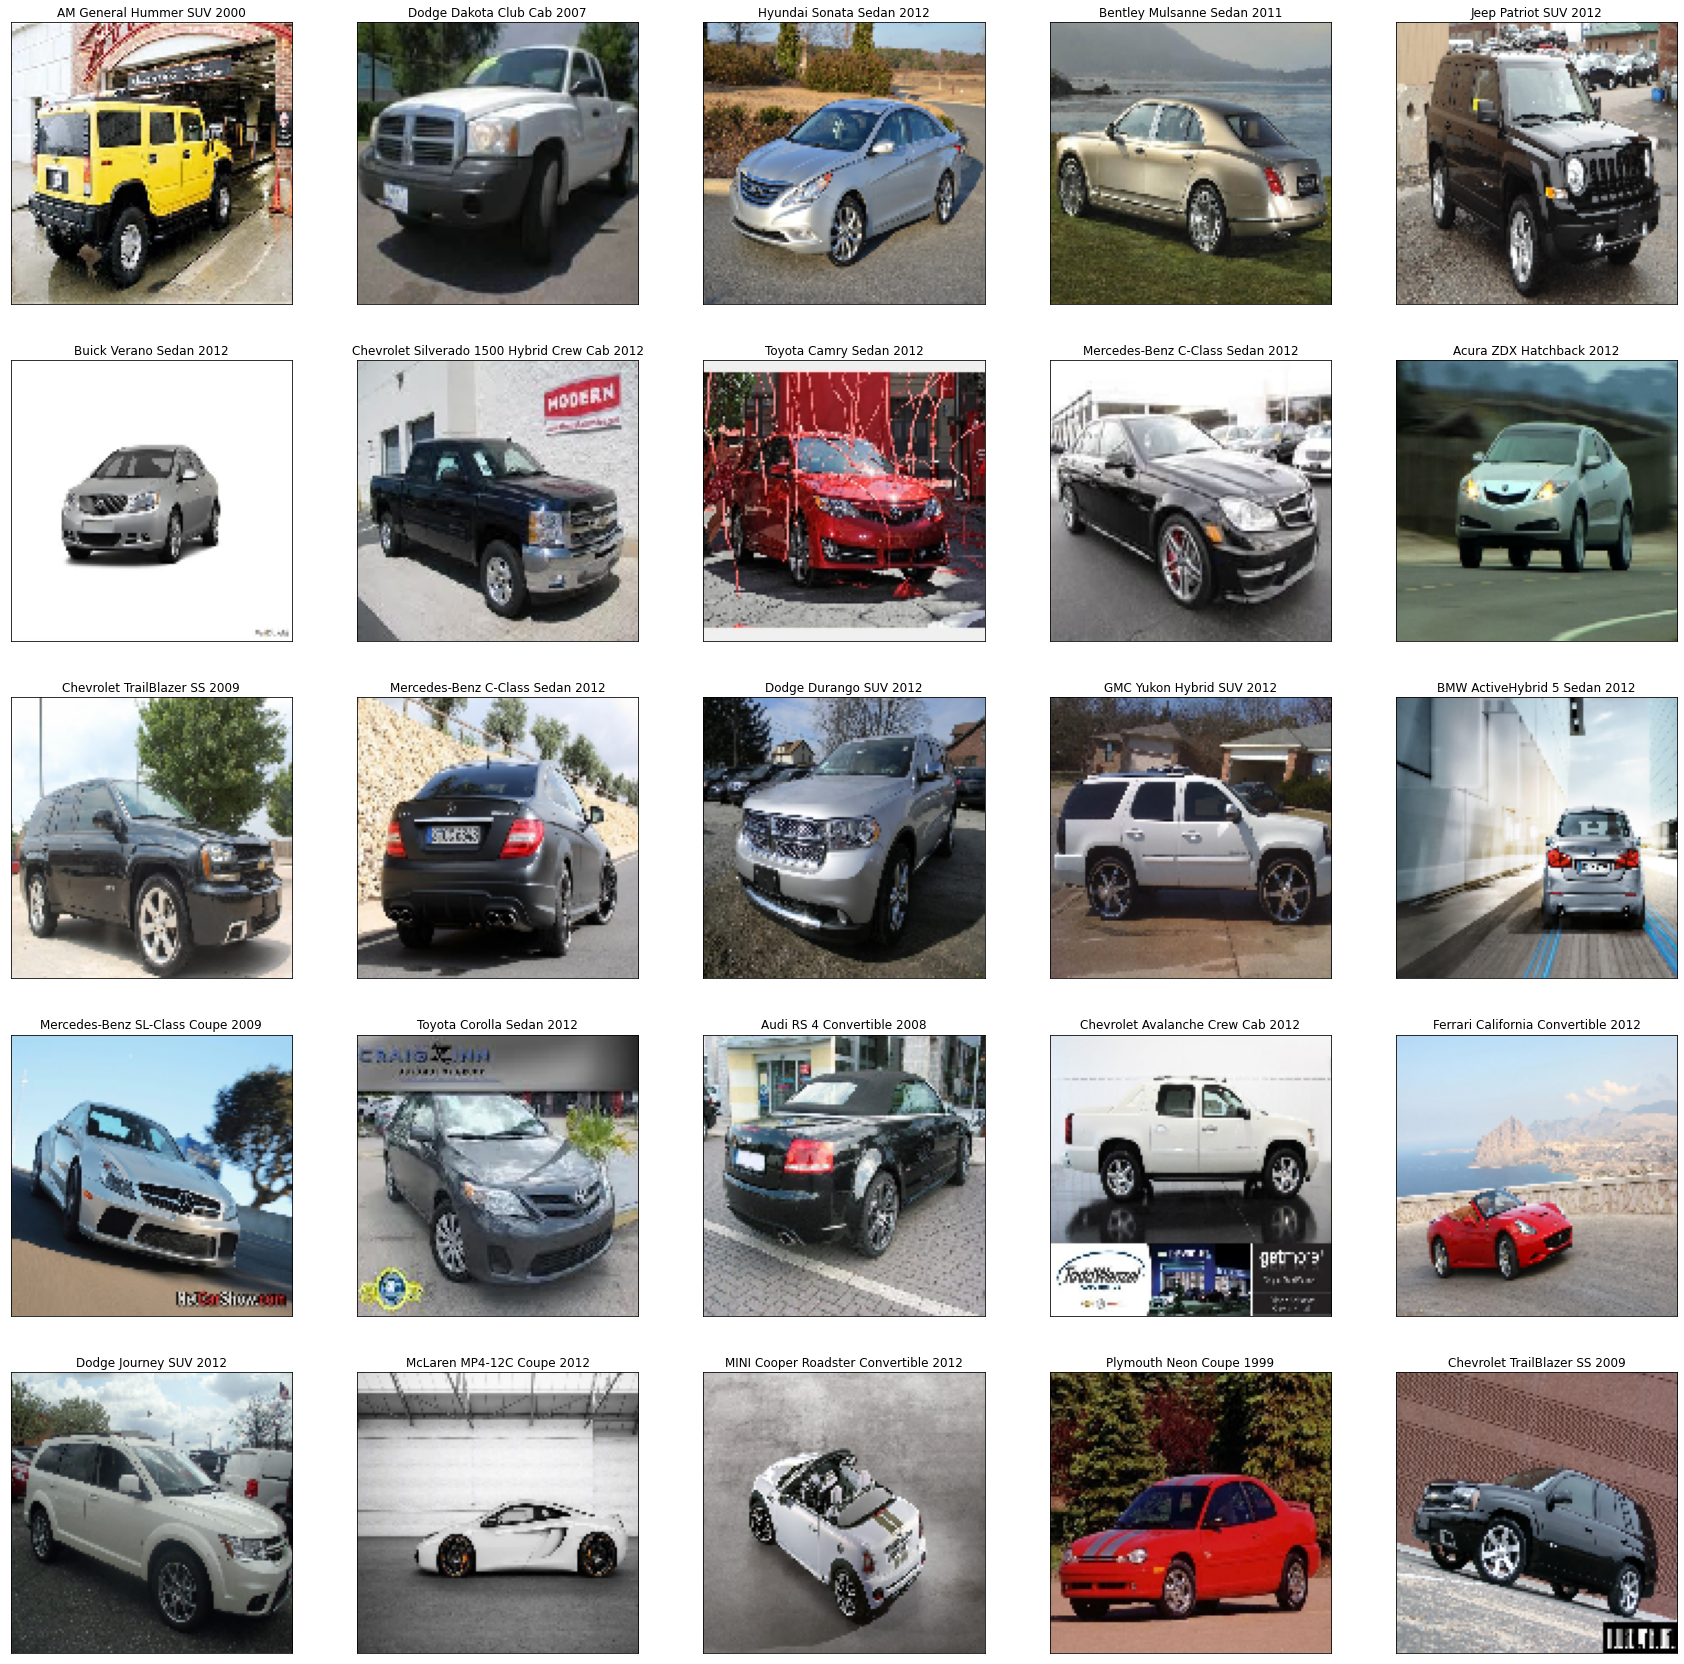

In [12]:
showRandomNxN(5)

In [7]:
import tensorflow.keras as ks
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

<class 'PIL.Image.Image'>


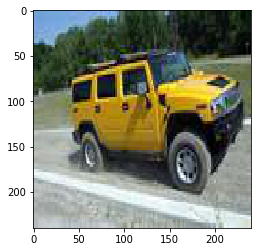

In [8]:
img = image.load_img("../car_ims/car_ims/000012.jpg", target_size=(240,240))
print(type(img))
plt.imshow(img)

In [10]:
def features_Model(numb, model, saveFeatures="features/temp.csv"):
# extrahiert Features (1000 Dimensionen) aus 'model'
# holt sich dann den Pfad von Funktion getPath()
# speichert anschließend die Features in einer .csv File

    num_of_imgs = numb*1000
    feature_df = pd.DataFrame()
    
    for jpegImg in range(num_of_imgs + 1 - 1000, num_of_imgs + 1): # ImageLoop von 1 - 16185
        img_path =  getPath(jpegImg)
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        feature_df = feature_df.append(pd.DataFrame(features), ignore_index=True)
        
        if jpegImg % 500 ==0:
            print("Done up to image {}".format(jpegImg))
    
    feature_df.to_csv(saveFeatures)

In [35]:
model = VGG16(weights='imagenet', include_top=True)
saveVGG16 = "featuresVGG16.csv"
runVGG16_for_features = features_Model(1, model, saveVGG16)

Done up to image 500
Done up to image 1000
